# Iterative Methods for Linear Systems

In [1]:
using DrWatson;
@quickactivate "MATH361Lectures";

In [2]:
using Plots, LaTeXStrings
default(markersize=3,linewidth=1.5);

In [3]:
using LinearAlgebra, IterativeSolvers, SparseArrays;

## The Idea

We want to approximate a solution to a linear system $Ax=b$ using an iterative formula such as 

$x^{(k+1)} = Bx^{(k)} + c,$

where $B$ is a matrix, often related to $A$, $c$ is a fixed vector, and for each $k$, $x^{(k)}$ is a vector.

Why use an iterative method? There are many applications, *e.g.*, the discretization of linear PDEs, that lead to very large linear systems. Furthermore, these lareg linear systems often have a structure and this structure plus the size of the system makes matrix factorization based methods inappropriate.  

For example, large, sparse (a system is sparse if most of the matrix entries are 0) linear systems a better solved using iterative methods becuase factorization methods such as Gaussian elimination result in adding nonzero entries to a sparse matrix.  

Several common iterative methods are:

1) [Jacobi](https://iterativesolvers.julialinearalgebra.org/dev/linear_systems/stationary/#Jacobi) iteration

2) [Gauss-Seidel](https://iterativesolvers.julialinearalgebra.org/dev/linear_systems/stationary/#Gauss-Seidel) iteration

3) [SOR](https://iterativesolvers.julialinearalgebra.org/dev/linear_systems/stationary/#SOR) (successive over-relaxation)

4) Krylov sbuspace methods such as [MINRES](https://iterativesolvers.julialinearalgebra.org/dev/linear_systems/minres/#MINRES) and [GMRES](https://iterativesolvers.julialinearalgebra.org/dev/linear_systems/gmres/#GMRES)

Before we discuss any mathematical theory, let's see how to use the Julia implementation of these methods that are provided by the [`IterativeSolvers.jl`](https://iterativesolvers.julialinearalgebra.org/dev/) package. 

## Julia Implementation Examples

In [4]:
A = [1.0 1.0 1.0;1.0 2.0 1.0;1.0 1.0 3.0]

3×3 Matrix{Float64}:
 1.0  1.0  1.0
 1.0  2.0  1.0
 1.0  1.0  3.0

In [5]:
b = [-1.0;5.0;7.0]

3-element Vector{Float64}:
 -1.0
  5.0
  7.0

Notice that $Ax=b$ has solution

$$x = \left[\begin{array}{c} -11 \\ 6 \\ 4 \end{array} \right]$$

In [6]:
x = [-11.0;6.0;4.0]
A*x

3-element Vector{Float64}:
 -1.0
  5.0
  7.0

In [7]:
jacobi!([0.0;0.0;0.0],A,b)

3-element Vector{Float64}:
 -14.148148148148149
   3.24074074074074
   2.061728395061728

In [8]:
gauss_seidel!([0.0;0.0;0.0],A,b)

3-element Vector{Float64}:
 -10.97666411052685
   5.994140625
   3.9941744951756157

In [9]:
sor!([0.0;0.0;0.0], A, b, 1.1)

3-element Vector{Float64}:
 -11.001141456294683
   6.000331208061764
   4.0002581020173755

In [10]:
minres!([0.0;0.0;0.0], A, b)

3-element Vector{Float64}:
 -10.999999999999972
   5.999999999999992
   4.000000000000002

In [11]:
gmres!([0.0;0.0;0.0], A, b)

3-element Vector{Float64}:
 -10.999999999999995
   6.000000000000001
   3.9999999999999996

## Questions for Thought

1) Does an iterative method converge for some initial guess $x^{(0)}$? 

2) Does an iterative method converge for any initial guess $x^{(0)}$?

3) What are the formulas or algorithms for the iterative meethods we illustrated?

4) How does the structure of the matrix $A$ in the linear system $Ax=b$ relate to the performance of an iterative method?

5) When should you use which method? 

Can you think of any other interesting relevant questions? 

Let's go to the board to do some mathematics related to iterative methods. 

In [12]:
function mat_iterate(x,B,c,its)
    for i = 1:its
        x = B*x + c
    end
    return x
end

mat_iterate (generic function with 1 method)

In [13]:
B1 = [-1/2 0.0 0.0;0 -1/3 0.0;0.0 0.0 1/4];
B2 = [2.0 0.0 0.0;0.0 -1/3 0.0; 0.0 0.0 1/4];
c = [-1.0;1.0;-1.0];
x0 = [0.0;0.0;0.0];

In [14]:
x1 = mat_iterate(x0,B1,c,15)

3-element Vector{Float64}:
 -0.66668701171875
  0.7500000522687895
 -1.33333333209157

In [15]:
B1*x1 + c

3-element Vector{Float64}:
 -0.666656494140625
  0.7499999825770702
 -1.3333333330228925

In [16]:
x2 = mat_iterate(x0,B2,c,15)

3-element Vector{Float64}:
 -32767.0
      0.7500000522687895
     -1.33333333209157

In [17]:
B2*x2 + c

3-element Vector{Float64}:
 -65535.0
      0.7499999825770702
     -1.3333333330228925

## Gauss-Seidel Implementation

In [18]:
function my_gs_iterate(x,A,b)
    n = size(A)[1];
    x[1] = b[1] - dot(A[1,2:n],x[2:n])
    x[1] = x[1]/A[1,1]
    for i = 2:n-1
        t = dot(A[i,1:i-1],x[1:i-1]) + dot(A[i,i+1:n],x[i+1:n])
        x[i] = b[i] - t
        x[i] = x[i]/A[i,i]
    end
    x[n] = b[n] - dot(A[n,1:n-1],x[1:n-1])
    x[n] = x[n]/A[n,n]
    return x
end

my_gs_iterate (generic function with 1 method)

In [19]:
x1 = my_gs_iterate([0.0;0.0;0.0],A,b)

3-element Vector{Float64}:
 -1.0
  3.0
  1.6666666666666667

In [20]:
gauss_seidel!([0.0;0.0;0.0],A,b,maxiter=1)

3-element Vector{Float64}:
 -1.0
  3.0
  1.6666666666666667

In [21]:
function my_gs(x,A,b,its)
    for i=1:its
        x = my_gs_iterate(x,A,b)
    end
    return x
end

my_gs (generic function with 1 method)

In [22]:
x1a = my_gs([0.0;0.0;0.0],A,b,1)

3-element Vector{Float64}:
 -1.0
  3.0
  1.6666666666666667

In [23]:
xs = my_gs([0.0;0.0;0.0],A,b,15)

3-element Vector{Float64}:
 -10.999267996275316
   5.99981689453125
   3.9998170339146886

In [29]:
A*xs

3-element Vector{Float64}:
 -0.9996340678293776
  5.000182826701872
  7.0

In [24]:
gauss_seidel!([0.0;0.0;0.0],A,b,maxiter=15)

3-element Vector{Float64}:
 -10.999267996275316
   5.99981689453125
   3.999817033914688

## Sparse Matrices in Julia

In [25]:
M = sparse([1.0 0.0 0.0 -1.0;-1.0 1.0 0.0 0.0;0.0 -1.0 1.0 0.0;0.0 0.0 -1.0 1.0])

4×4 SparseMatrixCSC{Float64, Int64} with 8 stored entries:
  1.0    ⋅     ⋅   -1.0
 -1.0   1.0    ⋅     ⋅ 
   ⋅   -1.0   1.0    ⋅ 
   ⋅     ⋅   -1.0   1.0

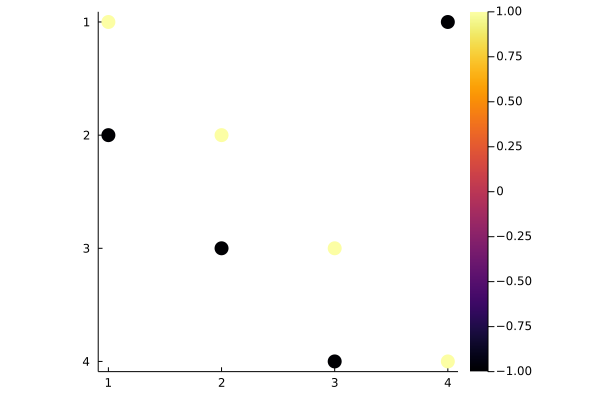

In [26]:
spy(M,markersize=8)

In [27]:
M = diagm(0 => -2.5*ones(200),-10 => 5.0*ones(200-10), 15 => -5.0*ones(200-15),199 => [10.0], -199 => [-10.0]);
M = sparse(M)

200×200 SparseMatrixCSC{Float64, Int64} with 577 stored entries:
⠑⢄⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈
⠑⢄⠑⢄⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠑⢄⠑⢄⠈⠱⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠑⢆⡑⢄⠈⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠑⢄⠑⢄⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠑⢄⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠑⢄⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠑⢄⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠑⢄⠀⠑⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠑⢄⠀⠓⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢤⠑⢄⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠑⢄⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠑⢄⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠑⢄⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠑⢄⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠑⢄⠀⠱⢄⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⡑⢄⠈⠱⢄⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢆⠑⢄⠀⠑⢄⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠑⢄⠀⠑
⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠑⢄

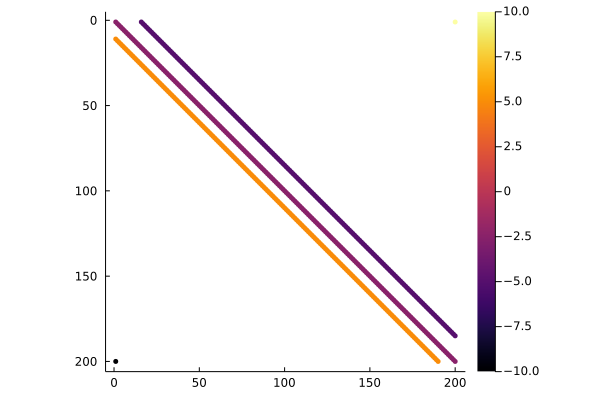

In [28]:
spy(M,markersize=3)